# PROBLEM STATEMENT

FundFusion belum memiliki strategi yang tepat untuk menawarkan jenis produk yang sesuai dengan segmen calon nasabah yang akan direkrut

# OBJECTIVE

Membuat Sebuah Model Clustering untuk mengetahui kepemilikan produk berdasarkan demografi nasabah yang saat ini sudah menggunakan layanan FundFusion dengan Silhouette Score >0.7

# VARIABEL

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---
**1. GCIF                     :** Unique Identifier Nasabah\
**2. Area                     :** Lokasi Nasabah (Jakarta,Bogor,Bandung,Surabaya,Jogja,Solo)\
**3. Jalur_Pembukaan          :** Touch Points Nasabah membuka produk --> Cabang, Telemarketing, Aplikasi Digital, Internet Banking\
**4. Vintage                  :** Durasi Menjadi Nasabah (Sejak membuka akun)\
**5. Usia                     :** Usia Nasabah\
**6. Jenis_Kelamin            :** Laki-laki (1) & Perempuan (0)\
**7. Status_Perkawinan        :** Belum Menikah (0), Menikah (1), Cerai (2), Janda/Duda (3)\
**8. Jumlah_Anak              :** Jumlah Anak Nasabah (numerik)\
**9. Pendidikan               :** Status Pendidikan Terakhir --> Tidak Memiliki Pendidikan Formal (0), SD (1), SMP (2), SMA (3), Sarjana (4), Magister (5), Doktor (6)\
**10. Produk_Tabungan         :** Status Kepemilikan Produk (Yes/1, No/0)\
**11. Produk_Deposito         :** Status Kepemilikan Produk (Yes/1, No/0)\
**12. Produk_Kartu_Kredit     :** Status Kepemilikan Produk (Yes/1, No/0)\
**13. Produk_Kredit_Rumah     :** Status Kepemilikan Produk (Yes/1, No/0)\
**14. Produk_Kredit_Kendaraan :** Status Kepemilikan Produk (Yes/1, No/0)\
**15. Produk_Kredit_Dana_Tunai:** Status Kepemilikan Produk (Yes/1, No/0)\
**16. Total_Kepemilikan_Produk:** Jumlah Produk Yang Dimiliki (Penjumlahan dari Produk2)\
**17. Pendapatan_Tahunan      :** Rata-rata Pendapatan Dalam Setahun\
**18. Total_Relationship_Balance :** Total Asset Nasabah dalam Cutoff Bulan Observasi\





# EXPERIMENT

Point of View:
1. Dikelompokkan berdasarkan demografis untuk dicari pattern kepemilikan produk
2. Dikelompookan berdasarkan kepemilikan produk untuk dicari patter berdasarkan demografisnya

# IMPORT PACKAGE

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [61]:
pd.set_option('display.max_columns', None)

# Data for Clustering

In [62]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(path_1)

In [63]:
data.head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,G28036,Bogor,Internet Banking,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,G04482,Bandung,Cabang,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,G07807,Bandung,Aplikasi Digital,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593


In [64]:
data.dtypes

GCIF                           object
Area                           object
Jalur_Pembukaan                object
Vintage                        object
Usia                          float64
Jenis_Kelamin                  object
Status_Perkawinan              object
Jumlah_Anak                     int64
Pendidikan                     object
Produk_Tabungan                 int64
Produk_Deposito                 int64
Produk_Kartu_Kredit             int64
Produk_Kredit_Rumah             int64
Produk_Kredit_Kendaraan         int64
Produk_Kredit_Dana_Tunai        int64
Total_Kepemilikan_Produk        int64
Pendapatan_Tahunan              int64
Total_Relationship_Balance      int64
dtype: object

# Data Understanding

In [65]:
#Hitung banyaknya nasabah di setiap cabang
data.groupby(('Area'))['Area'].count()

Area
Bandung     6917
Bogor       1191
Jakarta     7017
Jogja       3001
Solo        5001
Surabaya    5002
Name: Area, dtype: int64

In [66]:
#Hitung nilai rata-rata pada setiap variabel berdasarkan Area
data.groupby(('Area')).mean()

/var/folders/bc/dy88t47d1xj40g_47xyk27j40000gn/T/ipykernel_786/2604128488.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(('Area')).mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [67]:
#Hitung banyaknya kelompok usia nasabah
data.groupby(('Vintage'))['Vintage'].count()

Vintage
2 - 3 Tahun    13953
< 1 Tahun       9278
> 4 Tahun       4898
Name: Vintage, dtype: int64

In [68]:
#Hitung nilai rata-rata pada setiap variabel berdasarkan kelompok usia
data.groupby(('Vintage')).mean()

/var/folders/bc/dy88t47d1xj40g_47xyk27j40000gn/T/ipykernel_786/3966763833.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(('Vintage')).mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


In [69]:
#Hitung banyaknya first touch nasabah
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

Jalur_Pembukaan
Aplikasi Digital     6216
Cabang               5856
Internet Banking     5795
Telemarketing       10262
Name: Jalur_Pembukaan, dtype: int64

In [70]:
#Hitung nilai rata-rata pada setiap variabel berdasarkan first touch nasabah
data.groupby(('Jalur_Pembukaan')).mean()

/var/folders/bc/dy88t47d1xj40g_47xyk27j40000gn/T/ipykernel_786/3674946310.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(('Jalur_Pembukaan')).mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [71]:
#Hitung banyaknya nasabah berdasarkan status perkawinan
data.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

Status_Perkawinan
Belum Menikah     8168
Cerai             4077
Janda/Duda        4045
Menikah          11839
Name: Status_Perkawinan, dtype: int64

In [72]:
#Hitung nilai rata-rata pada setiap variabel berdasarkan status perkawinan
data.groupby(('Status_Perkawinan')).mean()

/var/folders/bc/dy88t47d1xj40g_47xyk27j40000gn/T/ipykernel_786/3152235985.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(('Status_Perkawinan')).mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


# Data Preparation

In [73]:
#cek variabel yang punya entri kosong
data.isnull().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [74]:
data = data.dropna()

In [75]:
data.isnull().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

In [76]:
data.duplicated().sum()

0

In [77]:
#cek data outlier
data.count()

GCIF                          24084
Area                          24084
Jalur_Pembukaan               24084
Vintage                       24084
Usia                          24084
Jenis_Kelamin                 24084
Status_Perkawinan             24084
Jumlah_Anak                   24084
Pendidikan                    24084
Produk_Tabungan               24084
Produk_Deposito               24084
Produk_Kartu_Kredit           24084
Produk_Kredit_Rumah           24084
Produk_Kredit_Kendaraan       24084
Produk_Kredit_Dana_Tunai      24084
Total_Kepemilikan_Produk      24084
Pendapatan_Tahunan            24084
Total_Relationship_Balance    24084
dtype: int64

In [78]:
from scipy import stats

In [79]:
z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
data = data[(z_scores < 3).all(axis=1)]

In [80]:
data.count()

GCIF                          23704
Area                          23704
Jalur_Pembukaan               23704
Vintage                       23704
Usia                          23704
Jenis_Kelamin                 23704
Status_Perkawinan             23704
Jumlah_Anak                   23704
Pendidikan                    23704
Produk_Tabungan               23704
Produk_Deposito               23704
Produk_Kartu_Kredit           23704
Produk_Kredit_Rumah           23704
Produk_Kredit_Kendaraan       23704
Produk_Kredit_Dana_Tunai      23704
Total_Kepemilikan_Produk      23704
Pendapatan_Tahunan            23704
Total_Relationship_Balance    23704
dtype: int64

# Filter Data: Telemarketing

In [81]:
data0 = data[data['Jalur_Pembukaan']=='Telemarketing']

In [82]:
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [83]:
data0 = data0.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index(drop=True)

In [84]:
data0 = data0.reset_index()

In [85]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


# Pembagian Dataset Experiment

1. Experiment 0 --> Semua variabel digunakan
2. Experiment 1 --> Gunakan variabel demografi
3. Experiment 2 --> Gunakan variabel financial related

In [86]:
data1 = data0.iloc[:,1:8]

In [87]:
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [88]:
data2 = data0.iloc[:,8:17]

In [89]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


# Encoding Data Kategori

In [90]:
data1 = pd.get_dummies(data1, columns=['Area','Vintage','Jenis_Kelamin','Status_Perkawinan','Pendidikan'])

In [91]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal
0,23.0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,30.0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
2,29.0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,49.0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
4,21.0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8649,58.0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
8650,42.0,3,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
8651,44.0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1


# Standardisasi Data Numerik

In [92]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [93]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))

In [94]:
X_num

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


In [95]:
X_num.columns = predname_num

In [96]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# Cek Nilai Korelasi

In [97]:
corr1 = data1.corr().abs()
corr2 = X_num.corr().abs()

In [98]:
#buang nilai redundance
upper = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(bool))
upper2 = corr2.where(np.triu(np.ones(corr2.shape), k=1).astype(bool))

In [99]:
#tandai nilai korelasi diatas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.7)]

In [100]:
#hapus kolom dengan korelasi diatas 0.7
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop2, axis = 1)

In [101]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal
0,23.0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0
1,30.0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0
2,29.0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0
3,49.0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0
4,21.0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
8649,58.0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1
8650,42.0,3,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
8651,44.0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1


In [102]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


In [103]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


In [104]:
data_combined = pd.concat([data1, X_num], axis=1, join='inner')

In [105]:
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# Modelling & Evaluation

Pembangunan model akan menggunakan 2 algoritma:
1. K-Means
2. K-Medoids

dengan metrik evaluasi Silhouette score

# K-Means

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Experiment 0: semua variabel digunakan

In [107]:
for n_clusters in range(3,6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Means) -" + str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -3 : 0.4337636155000406


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -4 : 0.41093123023700157


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -5 : 0.32999985928593295


Experiment 1: gunakan variabel demografi

In [108]:
for n_clusters in range(3,6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Means) -" + str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -3 : 0.5001832110224678


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -4 : 0.4618500330906909


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -5 : 0.4114962944410271


Experiment 2: gunakan variabel finance

In [109]:
for n_clusters in range(3,6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -" + str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -3 : 0.18408368480533613


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -4 : 0.19019713858843065


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -5 : 0.19917934939547233


# K-Medoids

In [110]:
!pip install scikit-learn-extra

In [111]:
from sklearn_extra.cluster import KMedoids

Experiment 0: gunakan semua variabel

In [112]:
for n_clusters in range(3,6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -" + str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.43369790762336996
Silhouette Score (K-Medoids) -4 : 0.33519427927551565
Silhouette Score (K-Medoids) -5 : 0.3211940252247904


Experiment 1: gunakan variabel demografi

In [113]:
for n_clusters in range(3,6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -" + str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp1_'+str(n_clusters)] = cluster_labels

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -3 : 0.0050675633465087746


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -4 : 0.4657942038387023


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -5 : 0.4178025801646672


Experiment 2: gunakan variabel finance

In [114]:
for n_clusters in range(3,6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -" + str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.11659038864364947
Silhouette Score (K-Medoids) -4 : 0.09680611087667029
Silhouette Score (K-Medoids) -5 : 0.08883545658405254


In [115]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance,Clustering_KMeans_Exp0_3,Clustering_KMeans_Exp0_4,Clustering_KMeans_Exp0_5,Clustering_KMeans_Exp1_3,Clustering_KMeans_Exp1_4,Clustering_KMeans_Exp1_5,Clustering_KMeans_Exp2_3,Clustering_KMeans_Exp2_4,Clustering_KMeans_Exp2_5,Clustering_KMedoids_Exp0_3,Clustering_KMedoids_Exp0_4,Clustering_KMedoids_Exp0_5,Clustering_KMedoids_Exp1_3,Clustering_KMedoids_Exp1_4,Clustering_KMedoids_Exp1_5,Clustering_KMedoids_Exp2_3,Clustering_KMedoids_Exp2_4,Clustering_KMedoids_Exp2_5
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586,1,2,2,1,1,1,0,2,1,0,0,0,0,3,3,2,3,4
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075,1,2,4,1,1,1,0,2,1,0,0,0,0,3,3,2,3,3
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088,1,2,2,1,1,1,0,2,1,0,0,0,0,3,3,2,3,4
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199,2,1,1,2,3,3,0,2,1,2,2,2,0,1,0,2,2,3
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562,1,2,2,1,1,1,0,2,1,0,0,0,0,3,3,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904,0,1,1,0,3,3,1,1,2,1,1,4,0,1,4,1,1,1
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967,0,1,1,0,0,0,1,0,4,1,1,4,0,0,4,2,2,2
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605,2,0,0,2,2,2,1,1,2,2,3,3,0,2,2,1,1,1
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694,2,0,0,2,2,2,1,0,4,2,2,2,0,2,2,0,0,0


# Hasil

In [118]:
cluster_means = data0[['Usia', 'Jumlah_Anak',\
                       'Produk_Tabungan','Produk_Deposito',\
                       'Produk_Kartu_Kredit','Produk_Kredit_Rumah',\
                       'Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai',\
                       'Total_Kepemilikan_Produk','Pendapatan_Tahunan',\
                       'Total_Relationship_Balance','Clustering_KMeans_Exp1_3']]\
                        .groupby('Clustering_KMeans_Exp1_3')\
                        .mean()
cluster_means

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Clustering_KMeans_Exp1_3,,,,,,,,,,,
0,58.063617,1.474844,0.688565,0.600416,0.342204,0.612474,0.170062,0.541788,2.955509,552.700208,2.379434e+08
1,29.503177,1.191528,1.000000,0.592436,0.308018,0.586989,0.157337,0.599092,3.243873,313.483812,2.439352e+08
2,44.974856,1.295617,0.988107,0.603126,0.333333,0.556575,0.154264,0.522936,3.158342,443.785593,2.384758e+08


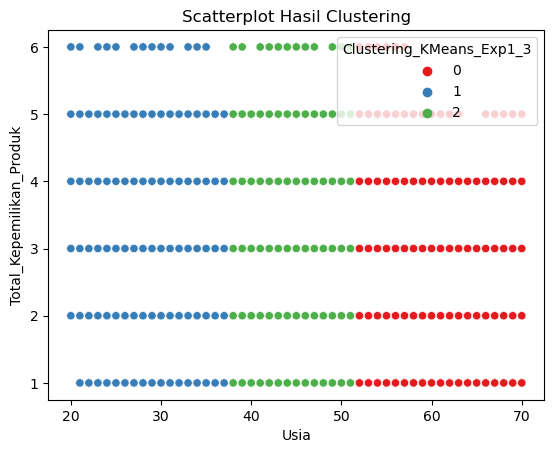

In [117]:
#Clustering berdasarkan usia nasabah
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatterplot Hasil Clustering')
plt.show()

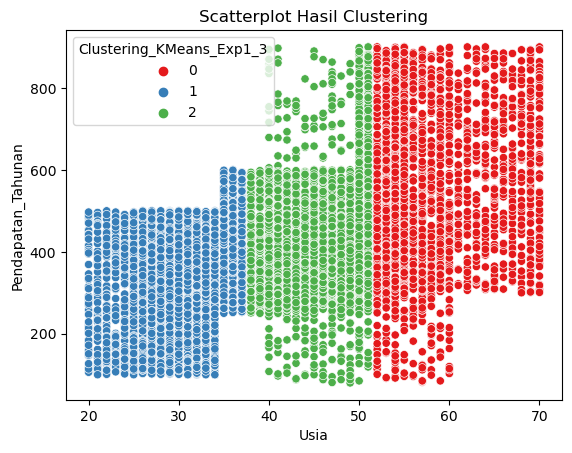

In [120]:
#Clustering berdasarkan pendapatan tahunan
sns.scatterplot(data=data0, x='Usia', y='Pendapatan_Tahunan', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatterplot Hasil Clustering')
plt.show()

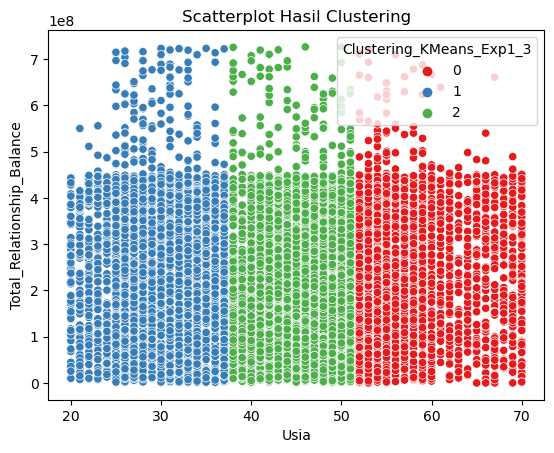

In [121]:
#Clustering berdasarkan pendapatan tahunan
sns.scatterplot(data=data0, x='Usia', y='Total_Relationship_Balance', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatterplot Hasil Clustering')
plt.show()

In [123]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Area'].value_counts(normalize=True)

Jakarta     0.482328
Bandung     0.163825
Surabaya    0.125572
Solo        0.125572
Jogja       0.074012
Bogor       0.028690
Name: Area, dtype: float64

In [124]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: Area, dtype: float64

In [125]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Area'].value_counts(normalize=True)

Jakarta     0.481821
Bandung     0.163099
Surabaya    0.132518
Solo        0.113829
Jogja       0.081210
Bogor       0.027523
Name: Area, dtype: float64

In [127]:
data0[data0['Clustering_KMeans_Exp1_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include='all')

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2405.000000,2405.000000,2405.000000,2.405000e+03
mean,58.063617,1.474844,2.955509,2.379434e+08
std,5.298230,1.478314,1.053131,1.382820e+08
min,52.000000,0.000000,1.000000,1.028000e+03
25%,54.000000,0.000000,2.000000,1.245667e+08
50%,57.000000,1.000000,3.000000,2.322131e+08
75%,61.000000,3.000000,4.000000,3.491686e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [128]:
data0[data0['Clustering_KMeans_Exp1_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include='all')

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [129]:
data0[data0['Clustering_KMeans_Exp1_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include='all')

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2943.000000,2943.000000,2943.000000,2.943000e+03
mean,44.974856,1.295617,3.158342,2.384758e+08
std,3.976996,1.474092,1.038061,1.439379e+08
min,38.000000,0.000000,1.000000,1.587496e+06
25%,42.000000,0.000000,2.000000,1.178243e+08
50%,45.000000,1.000000,3.000000,2.325173e+08
75%,48.000000,3.000000,4.000000,3.468223e+08
max,51.000000,4.000000,6.000000,7.259942e+08


# Insight

**1. Cluster total kepemilikan produk finansial berdasarkan usia**
- Kelompok usia yang berhasil dikelompokkan adalah:

*Nasabah usia 20-37*

*Nasabah usia 38-51*

*Nasabah usia 52-70*

- Pada semua kelompok usia, setiap nasabah setidaknya memiliki 1 hingga 5 produk.

**2. Cluster pendapatan tahunan berdasarkan usia**
- Untuk memasarkan produk finansial, target paling potensial adalah kelompok nasabah dengan usia 52-70.

**3. Cluster total saldo pada seluruh produk finansial berdasarkan usia**
- Secara umum, seluruh nasabah memiliki total saldo maksimal di angka 450 juta. Angka ini bisa dijadikan benchmark untuk program Nasabah Prioritas.

**4. Area dengan nasabah terbanyak adalah Jakarta**